In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv('DA314_S4_GlamNest_Data_Practice.csv')

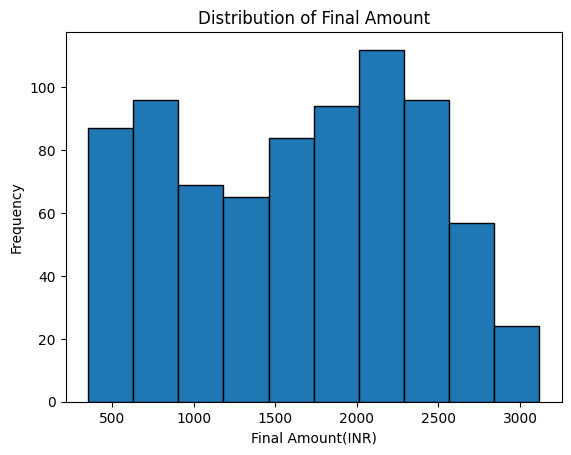

In [3]:
plt.hist(df['final_amount'],bins=10,edgecolor='black')
plt.xlabel('Final Amount(INR)')
plt.ylabel('Frequency')
plt.title('Distribution of Final Amount')
plt.show()

C:\Users\Haani\AppData\Local\Temp\ipykernel_7496\3851883630.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['service_rating'],color='green',shade=True)


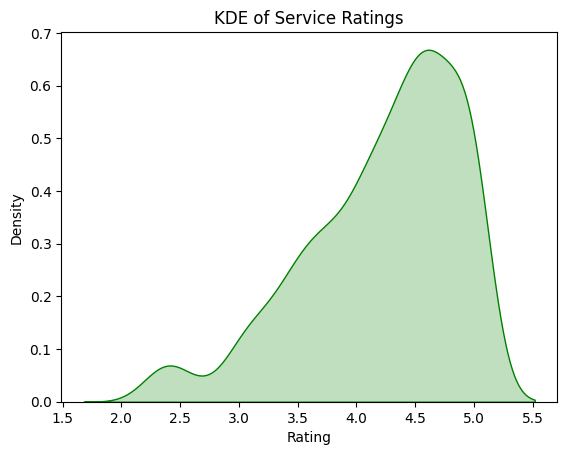

In [4]:
sns.kdeplot(df['service_rating'],color='green',shade=True)
plt.xlabel('Rating')
plt.title('KDE of Service Ratings')
plt.show()

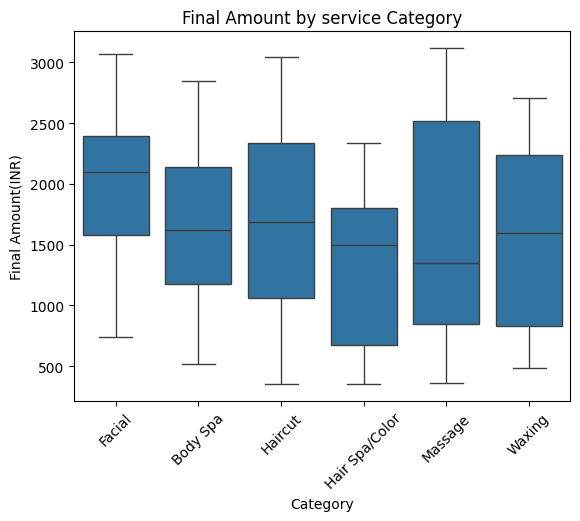

In [5]:
sns.boxplot(x='category', y='final_amount', data=df)
plt.xlabel('Category')
plt.ylabel('Final Amount(INR)')
plt.title('Final Amount by service Category')
plt.xticks(rotation=45)
plt.show()

<h1 style="font-size:2.2em;">Bar Chart</h1>


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Facial'),
  Text(1, 0, 'Massage'),
  Text(2, 0, 'Haircut'),
  Text(3, 0, 'Waxing'),
  Text(4, 0, 'Body Spa'),
  Text(5, 0, 'Hair Spa/Color')])

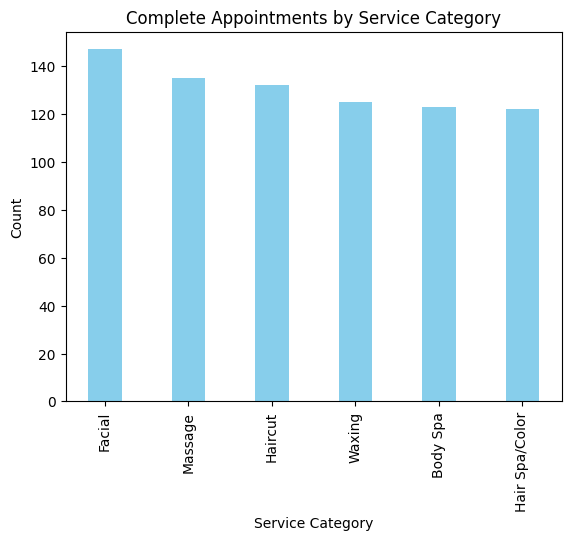

In [6]:
plt.bar(df['category'].value_counts().index, df['category'].value_counts().values, width=0.4, color='skyblue')
plt.xlabel('Service Category')
plt.ylabel('Count')
plt.title('Complete Appointments by Service Category')
plt.xticks(rotation=90)

<h1 style="font-size:2.2em;">Line Chart</h1>


In [7]:
df['appointment_date'] = pd.to_datetime(df['appointment_date'], format='%d/%m/%Y')

monthy_avg = df.groupby(df['appointment_date'].dt.to_period('M'))['final_amount'].mean().reset_index()

monthy_avg['appointment_date'] = monthy_avg['appointment_date'].dt.to_timestamp()

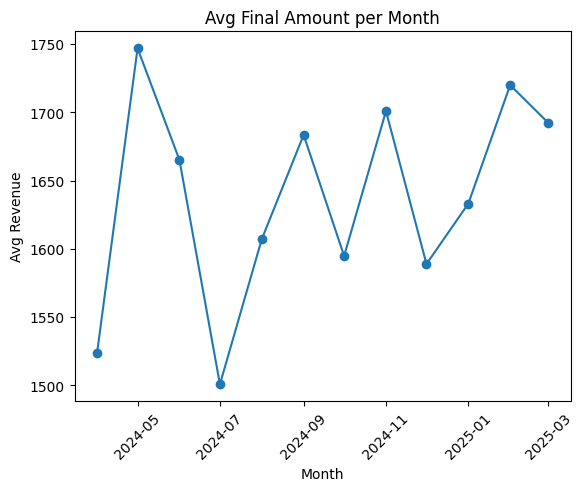

In [8]:
plt.plot(monthy_avg['appointment_date'], monthy_avg['final_amount'], marker='o')
plt.title("Avg Final Amount per Month")
plt.xlabel("Month")
plt.ylabel("Avg Revenue")
plt.xticks(rotation=45)
plt.show()

In [9]:
appointments_by_city = df.groupby('city').agg(
    cancelled=('status', lambda x: (x=='Cancelled').sum()),
    completed=('status', lambda x: (x == 'Completed').sum())
).reset_index()
appointments_by_city

,city,cancelled,completed
0,Bangaluru,45,102
1,Delhi,51,100
2,Hyderabad,59,117
3,Kolkata,56,110
4,Mumbai,50,94


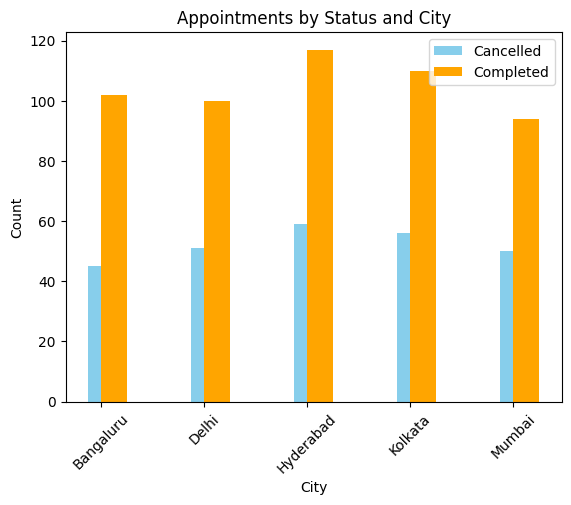

In [10]:
plt.bar(appointments_by_city['city'], height=appointments_by_city['cancelled'], width=0.25, color='skyblue', label='Cancelled')
plt.bar(appointments_by_city['city'], height=appointments_by_city['completed'], width=0.25, color='orange', align='edge', label='Completed')
plt.title("Appointments by Status and City")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

In [11]:
payment_method_city = df.groupby(['city', 'payment_method'], as_index=False).agg(
    count=('user_id','count')
)
res = payment_method_city.pivot_table(values='count', index='city', columns='payment_method')
res

payment_method,Cash,Credit Card,Google Pay,PayPal,Paytm,PhonePe,UPI,gpay
city,,,,,,,,
Bangaluru,39.0,41.0,2.0,33.0,1.0,NaN,30.0,1.0
Delhi,38.0,42.0,2.0,37.0,1.0,2.0,29.0,NaN
Hyderabad,37.0,43.0,NaN,54.0,NaN,1.0,40.0,1.0
Kolkata,42.0,41.0,2.0,29.0,3.0,3.0,44.0,2.0
Mumbai,40.0,37.0,NaN,32.0,2.0,1.0,30.0,2.0


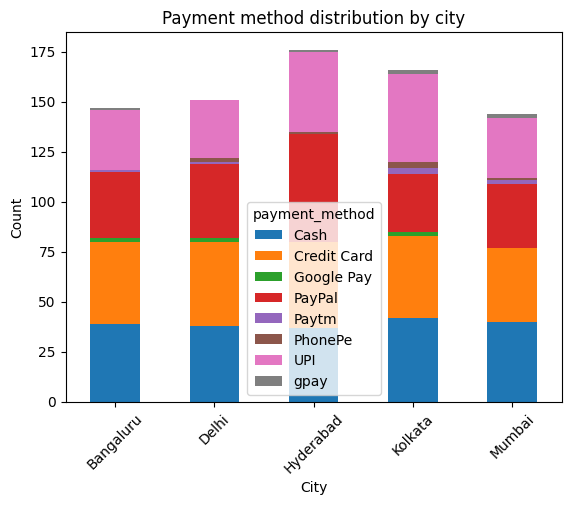

In [12]:
res.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Payment method distribution by city")
plt.show()

In [13]:
pie = df.groupby('category')['user_id'].count().reset_index()
pie['user_percentage'] = pie['user_id'] / sum(pie['user_id']) * 100
pie = pie.sort_values('user_percentage')

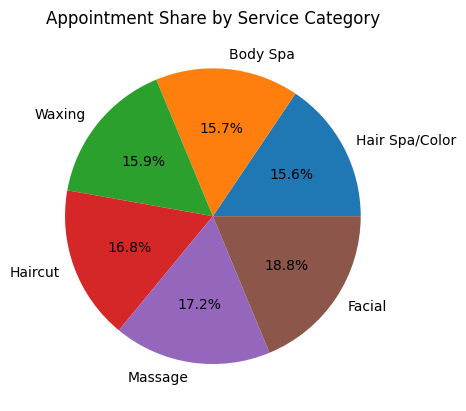

In [14]:
plt.pie(pie['user_percentage'], labels=pie['category'], autopct="%1.1f%%")
plt.title("Appointment Share by Service Category")
plt.show()

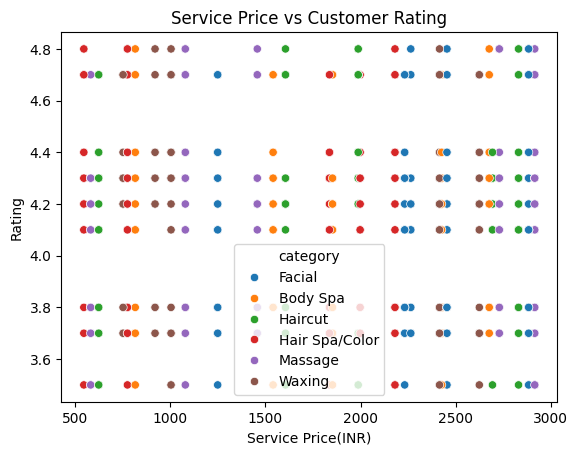

In [15]:
sns.scatterplot(df, x='price', y='rating', hue='category')
plt.xlabel("Service Price(INR)")
plt.ylabel("Rating")
plt.title("Service Price vs Customer Rating")
plt.show()

<h1>Day-3</h1>

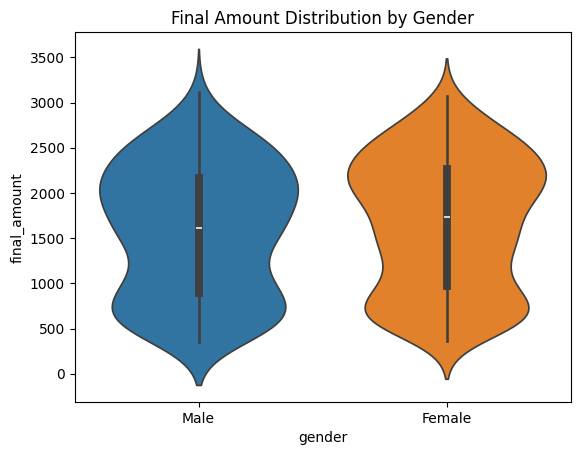

In [20]:
sns.violinplot(df, x='gender', y='final_amount', hue='gender')
plt.title("Final Amount Distribution by Gender")
plt.show()

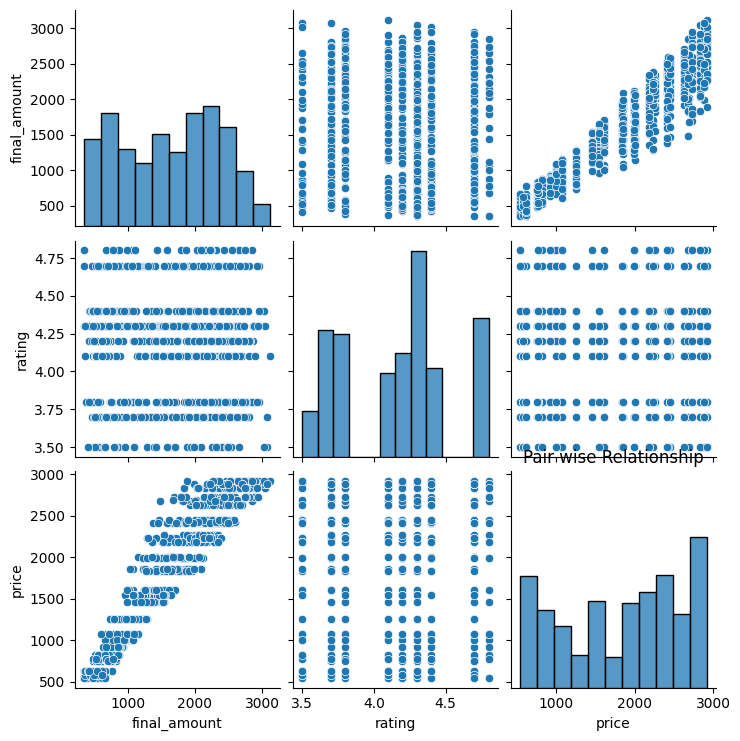

In [17]:
sns.pairplot(df[['final_amount', 'rating','price']])
plt.title("Pair wise Relationship")
plt.show()

<Figure size 900x400 with 0 Axes>

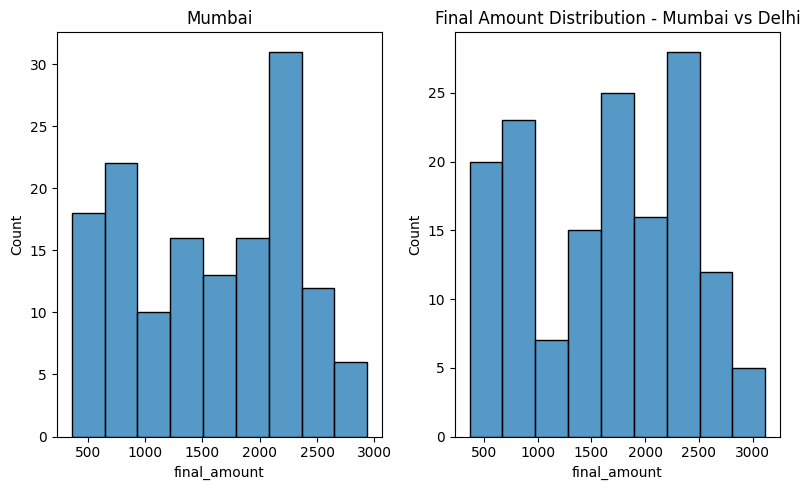

In [18]:
plt.figure(figsize=(9, 4))
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

sns.histplot(df.loc[df['city'] == 'Mumbai', 'final_amount'], ax=ax[0])
sns.histplot(df.loc[df['city'] == 'Delhi', 'final_amount'], ax=ax[1])
ax[0].set_title("Mumbai")
ax[1].set_title("Delhi")
plt.title("Final Amount Distribution - Mumbai vs Delhi")
plt.tight_layout()
plt.show()